In [1]:
import time, sys

# Import the Qiskit 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QiskitError
from qiskit import execute, IBMQ, BasicAer, transpiler, Aer
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.mapper import Layout

import numpy as np
import qiskit

# Define your backend

In [2]:
from qiskit import IBMQ

# insert your token & URL here
IBMQ.enable_account('<token>',
                    url='<url>')

# check available backends
print("Available backends:")
IBMQ.backends()

Remote backend "ibmqx_qasm_simulator" could not be instantiated due to an invalid config: {'local': ['Missing data for required field.'], 'backend_version': ['Missing data for required field.'], 'open_pulse': ['Missing data for required field.'], 'gates': {0: {'qasm_def': ['Missing data for required field.'], 'parameters': ['Missing data for required field.'], 'name': ['Missing data for required field.']}}, 'max_shots': ['Missing data for required field.'], 'memory': ['Missing data for required field.'], 'basis_gates': ['Missing data for required field.'], 'n_qubits': ['Missing data for required field.'], 'backend_name': ['Missing data for required field.'], 'conditional': ['Missing data for required field.']}


Available backends:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q-ornl, bes-qis, argonne)>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-ornl, bes-qis, argonne)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-ornl, bes-qis, argonne)>]

# Define the layout

In [7]:
# execute on the IBM Tokyo 20 Qubit Machine
#backend = IBMQ.get_backend('ibmq_qasm_simulator')
backend = IBMQ.get_backend('ibmq_20_tokyo')
print(backend)
backend.status()

ibmq_20_tokyo


BackendStatus(backend_name='ibmq_20_tokyo', backend_version='1.2.6', operational=True, pending_jobs=0, status_msg='active')

# Define the UCCSD ansatz circuit

In [4]:
def get_ucc_ansatz(theta):
    circuit = QuantumCircuit(2, 2)
    circuit.x(0)
    circuit.ry(theta, 1)
    circuit.cx(1, 0)
    return circuit

# Define the naive measurement circuits

In [5]:
shots1 = 25

def measure_zi_simple(theta, ZI_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots1)
    print(job.job_id())
    ZI_job_IDs.append(job.job_id())
    
def measure_iz_simple(theta, IZ_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots1)
    print(job.job_id())
    IZ_job_IDs.append(job.job_id())
    
def measure_xx_simple(theta, XX_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.h(0)
    circuit.h(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots1)
    print(job.job_id())
    XX_job_IDs.append(job.job_id())

def measure_yy_simple(theta, YY_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.h(0)
    circuit.sdg(0)
    circuit.h(1)
    circuit.sdg(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots1)
    print(job.job_id())
    YY_job_IDs.append(job.job_id())

def measure_hamiltonian_simple(theta, ZI_job_IDs, IZ_job_IDs, XX_job_IDs, YY_job_IDs):
    measure_zi_simple(theta, ZI_job_IDs)
    measure_iz_simple(theta, IZ_job_IDs)
    measure_xx_simple(theta, XX_job_IDs)
    measure_yy_simple(theta, YY_job_IDs)

# Define the simultaneous measurement circuits

In [6]:
shots2 = 50

def measure_zi_and_iz(theta, ZI_and_IZ_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots2)
    print(job.job_id())
    ZI_and_IZ_job_IDs.append(job.job_id())
    
def measure_xx_and_yy(theta, XX_and_YY_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.cx(0, 1)
    circuit.h(0)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots2)
    print(job.job_id())
    XX_and_YY_job_IDs.append(job.job_id())

def measure_simultaneously_hamiltonian_simple(theta, ZI_and_IZ_job_IDs, XX_and_YY_job_IDs):
    measure_zi_and_iz(theta, ZI_and_IZ_job_IDs)
    measure_xx_and_yy(theta, XX_and_YY_job_IDs)

# Submit the job to Qiskit and get the job IDs

In [7]:
import numpy as np
import qiskit

ZI_job_IDs = []
IZ_job_IDs = []
XX_job_IDs = []
YY_job_IDs = []

ZI_and_IZ_job_IDs = []
XX_and_YY_job_IDs = []

theta_values = []

for theta in np.arange(-np.pi, np.pi, np.pi / 12):
    print(theta)
    measure_hamiltonian_simple(theta, ZI_job_IDs, IZ_job_IDs, XX_job_IDs, YY_job_IDs)
    measure_simultaneously_hamiltonian_simple(theta, ZI_and_IZ_job_IDs, XX_and_YY_job_IDs)
    theta_values.append(theta)
print('Done!')

-3.141592653589793
5d3a276cda29d900188ab2f1
5d3a277035aebf00180b0086
5d3a2774512e5300182a101c
5d3a2779ee3e7000180cd4e0
5d3a277dee3e7000180cd4e2
5d3a2781cf4ef70018f2aa78
-2.8797932657906435
5d3a2785da29d900188ab2f3
5d3a2789dc54600019d89c81
5d3a278dcf4ef70018f2aa7a
5d3a279135aebf00180b0088
5d3a2795dc54600019d89c83
5d3a27998ffd270018151d94
-2.617993877991494
5d3a279dee3e7000180cd4e4
5d3a27a5512e5300182a101e
5d3a27a9cf4ef70018f2aa7c
5d3a27ad35aebf00180b008a
5d3a27b1baa4500018f8865e
5d3a27babaa4500018f88660
-2.3561944901923444
5d3a27bedc54600019d89c85
5d3a27c5baa4500018f88662
5d3a27c9f68fb70018990dd3
5d3a27cdbaa4500018f88664
5d3a27d1f68fb70018990dd5
5d3a27d5f68fb70018990dd7
-2.094395102393195
5d3a27daee3e7000180cd4e6
5d3a27de512e5300182a1020
5d3a27e235aebf00180b008c
5d3a27e68ffd270018151d96
5d3a27eabaa4500018f88666
5d3a27ee35aebf00180b008e
-1.8325957145940452
5d3a27f2512e5300182a1022
5d3a27f643f0a3001927de24
5d3a27facf4ef70018f2aa7e
5d3a27fe512e5300182a1024
5d3a2802baa4500018f88668
5d3a2806

# push job IDs to list for easier processing
you will need to do this before closing the computer to make your life easier later on :)

In [9]:
print('ZI_job_IDs is = ')
print(ZI_job_IDs)
print()

print('IZ_job_IDs is = ')
print(IZ_job_IDs)
print()

print('XX_job_IDs is = ')
print(XX_job_IDs)
print()

print('YY_job_IDs = ')
print(YY_job_IDs)
print()

print('ZI_and_IZ_job_IDs = ')
print(ZI_and_IZ_job_IDs)
print()

print('XX_and_YY_job_IDs = :')
print(XX_and_YY_job_IDs)
print()

print('theta_values = ')
print(theta_values)

ZI_job_IDs is :
['5d3a276cda29d900188ab2f1', '5d3a2785da29d900188ab2f3', '5d3a279dee3e7000180cd4e4', '5d3a27bedc54600019d89c85', '5d3a27daee3e7000180cd4e6', '5d3a27f2512e5300182a1022', '5d3a280bbaa4500018f8866a', '5d3a2829f68fb70018990dd9', '5d3a2844cf4ef70018f2aa82', '5d3a285e35aebf00180b0096', '5d3a2879512e5300182a1026', '5d3a2895ee3e7000180cd4f4', '5d3a28ae512e5300182a1028', '5d3a28c8baa4500018f8866c', '5d3a28e243f0a3001927de2a', '5d3a2901ee3e7000180cd4f8', '5d3a291bbaa4500018f88672', '5d3a2935f68fb70018990de1', '5d3a294fda29d900188ab301', '5d3a296cdc54600019d89c9f', '5d3a298dcf4ef70018f2aa8c', '5d3a29a8512e5300182a1030', '5d3a29c6f68fb70018990de7', '5d3a29e3512e5300182a1032']

IZ_job_IDs is :
['5d3a277035aebf00180b0086', '5d3a2789dc54600019d89c81', '5d3a27a5512e5300182a101e', '5d3a27c5baa4500018f88662', '5d3a27de512e5300182a1020', '5d3a27f643f0a3001927de24', '5d3a281035aebf00180b0092', '5d3a282ddc54600019d89c89', '5d3a2848dc54600019d89c8d', '5d3a286435aebf00180b0098', '5d3a287d8ffd

### (Check the status of the specific job)

In [7]:
backend.retrieve_job('').status()

<JobStatus.DONE: 'job has successfully run'>

# Retyping the job IDs
just copy and paste from the print statement results in the previous block that shows the list

In [5]:
ZI_job_IDs = []
...

# Retrieve the job results

### compute the energy sums for naive measurement

In [9]:
#backend = IBMQ.get_backend('')
shots1 = 25
final_result_naive = []
for i in range (len(theta_values)):
    
    zi_counts = backend.retrieve_job(ZI_job_IDs[i]).result().get_counts()
    zi_contribution = (zi_counts.get('00', 0) + zi_counts.get('10', 0) 
                       - zi_counts.get('11', 0) - zi_counts.get('01', 0)) / shots1
    #print(zi_counts)
    #print(zi_counts.get('10', 0))
    #print(zi_contribution)
    
    iz_counts = backend.retrieve_job(IZ_job_IDs[i]).result().get_counts()
    iz_contribution = (iz_counts.get('00', 0) + iz_counts.get('01', 0) 
                       - iz_counts.get('10', 0) - iz_counts.get('11', 0)) / shots1
    
    xx_counts = backend.retrieve_job(XX_job_IDs[i]).result().get_counts()
    xx_contribution = (xx_counts.get('00', 0) + xx_counts.get('11', 0) 
                       - xx_counts.get('01', 0) - xx_counts.get('10', 0)) / shots1
    
    yy_counts = backend.retrieve_job(YY_job_IDs[i]).result().get_counts()
    yy_contribution = (yy_counts.get('00', 0) + yy_counts.get('11', 0) 
                       - yy_counts.get('01', 0) - yy_counts.get('10', 0)) / shots1
    
    total = 5.9 + .22 * zi_contribution - 6.1 * iz_contribution - 2.14 * xx_contribution - 2.14 * yy_contribution
    final_result_naive.append(total)
    print(total)

10.7148
12.138
12.1076
11.9204
10.448
9.8004
9.624
7.6268
5.274000000000001
3.8428000000000013
1.8348000000000018
0.7984000000000007
-0.25479999999999914
-1.1315999999999988
-1.0708000000000002
-0.7895999999999994
-1.1356000000000002
1.2499999999999996
1.992400000000001
3.846800000000001
5.7216000000000005
6.9536
9.4132
10.901200000000003


### compute the energy sums for simultaneous measurement

In [12]:
#backend = IBMQ.get_backend('ibmq_qasm_simulator')
shots2 = 50

final_result_simultaneous = []
for i in range (len(theta_values)):
    zi_and_iz_counts = backend.retrieve_job(ZI_and_IZ_job_IDs[i]).result().get_counts()
    zi_contribution = (zi_and_iz_counts.get('00', 0) + zi_and_iz_counts.get('10', 0) 
                       - zi_and_iz_counts.get('11', 0) - zi_and_iz_counts.get('01', 0)) / shots2
    iz_contribution = (zi_and_iz_counts.get('00', 0) + zi_and_iz_counts.get('01', 0) 
                       - zi_and_iz_counts.get('10', 0) - zi_and_iz_counts.get('11', 0)) / shots2
    #print(zi_and_iz_counts)
    xx_and_yy_counts = backend.retrieve_job(XX_and_YY_job_IDs[i]).result().get_counts()
    xx_contribution = (xx_and_yy_counts.get('00', 0) + xx_and_yy_counts.get('10', 0) 
                       - xx_and_yy_counts.get('11', 0) - xx_and_yy_counts.get('01', 0)) / shots2
    zz_contribution = (xx_and_yy_counts.get('00', 0) + xx_and_yy_counts.get('01', 0) 
                       - xx_and_yy_counts.get('10', 0) - xx_and_yy_counts.get('11', 0)) / shots2
    yy_contribution = -xx_contribution * zz_contribution
    total = 5.9 + .22 * zi_contribution - 6.1 * iz_contribution - 2.14 * xx_contribution - 2.14 * yy_contribution
    final_result_simultaneous.append(total)
    print(total)

11.497608000000001
11.616200000000001
11.88044
11.21974
11.486404
9.949722000000001
9.228010000000001
7.436040000000002
5.8725200000000015
3.6337960000000002
2.4998400000000007
0.9269600000000018
-0.11220999999999971
-1.1195680000000001
-0.7141519999999991
-1.4844799999999991
-0.2040200000000001
0.5369399999999998
2.8495600000000003
3.33702
4.4882800000000005
7.845826
8.968991999999998
10.12722


# Superimpose naive vs. simultaneous results

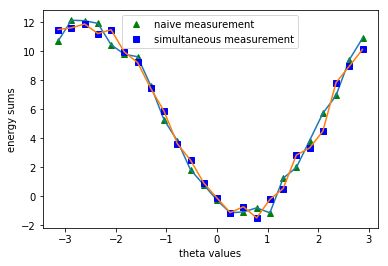

In [14]:
import matplotlib.pyplot as plt
plt.plot(theta_values, final_result_naive, 'g^', label = "naive measurement")
plt.plot(theta_values, final_result_naive)
plt.plot(theta_values, final_result_simultaneous, 'bs', label = "simultaneous measurement")
plt.plot(theta_values, final_result_simultaneous)
plt.legend(loc='best')
plt.xlabel('theta values')
plt.ylabel('energy sums')
plt.show()

# Compute and plot the difference from theory (many shots running on simulator)

In [16]:
values_theory = [12.191751999999997, 13.15524, 13.462224, 13.381992, 12.837567999999997, 11.637923999999998, 10.217920000000001, 8.380472000000001, 6.38668, 4.4392, 2.5525520000000013, 0.8814480000000007, -0.42213999999999907, -1.3090319999999995, -1.7176839999999993, -1.5886079999999994, -0.9050319999999998, 0.2661680000000004, 1.5365760000000002, 3.4022159999999992, 5.413296000000001, 7.372232, 9.278692, 10.918935999999999]
value_diff, value2_diff = [], []
for theta in range(len(theta_values)):
    value_diff.append(abs(final_result_naive[theta] - values_theory[theta]))
    value2_diff.append(abs(final_result_simultaneous[theta] - values_theory[theta]))

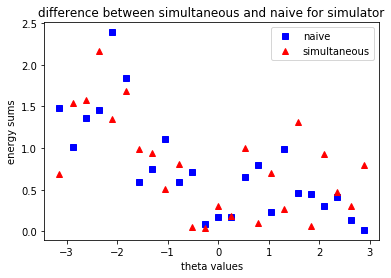

In [20]:
import matplotlib.pyplot as plt
plt.plot(theta_values, value_diff, 'bs', label='naive')
plt.plot(theta_values, value2_diff, 'r^', label='simultaneous')
plt.xlabel('theta values')
plt.ylabel('energy sums')
plt.title('difference between simultaneous and naive for simulator')
plt.legend()
plt.show()

In [25]:
len(['hi' for v1, v2 in zip(value_diff, value2_diff) if v1 > v2])

9

In [23]:
print(sum(value_diff))

18.179623999999983


In [24]:
print(sum(value2_diff))

18.82575999999999
